In [1]:
import pandas as pd

In [2]:
tournaments = pd.read_csv('./Data Files/tournament.csv')
matches = pd.read_csv('./Data Files/match.csv')

In [3]:
for tournament in tournaments.Tournament_ID:
    winner = matches[(matches['Tournament_ID'] == tournament) & (matches['Match_Type'] == 'Final')]['Winner'].values[0]
    
    tournaments.loc[tournaments['Tournament_ID'] == tournament, 'Winner'] = winner

In [4]:
tournaments.to_csv('./Data Files/tournament.csv', index=False)

In [5]:
plProfile = pd.read_csv('./Data Files/playerProfile.csv')

In [6]:
plProfile.columns = ['Player_ID', 'Year', 'Achievements', 'CoachName']

In [7]:
players = pd.read_csv('./Data Files/player.csv')

In [13]:
players['Player_Rating'] = 0

players['Player_Rating'] = players['Player_Rating'].astype('int')

In [14]:
players['FIDE_Percentile'] = 0

players['FIDE_Percentile'] = players['FIDE_Percentile'].astype('int')

In [15]:
plProfile['Achievements'] = ''

In [16]:
for tournament in tournaments.Tournament_ID:
    winner = matches[(matches['Tournament_ID'] == tournament) & (matches['Match_Type'] == 'Final')]['Winner'].values[0]
    plys = list(matches[(matches['Tournament_ID'] == tournament) & (matches['Match_Type'] == 'Final')][['Player_Black', 'Player_White']].values[0])

    second = plys[0] if plys[1] == winner else plys[1]
    tournamentName = tournaments[tournaments['Tournament_ID'] == tournament]['Tournament_Name'].values[0]
    tournamentYear = tournaments[tournaments['Tournament_ID'] == tournament]['Start_Date'].values[0]
    tournamentYear = tournamentYear.split('-')[0]

    plProfile.loc[(plProfile['Player_ID'] == winner) & (plProfile['Year'] == int(tournamentYear)), 'Achievements'] += f'Winner of {tournamentName}, {tournamentYear} | '
    plProfile.loc[(plProfile['Player_ID'] == second) & (plProfile['Year'] == int(tournamentYear)), 'Achievements'] += f'Runner-Up of {tournamentName}, {tournamentYear} | ' 

In [19]:
plProfile[plProfile['Achievements'] != '']

,Player_ID,Year,Achievements,CoachName
85,HR-92-EXFA,2010,"Runner-Up of Collins LLC Chess Meet, 2010 |",Tracy Baird
213,CL-99-MDQK,2010,"Winner of Collins LLC Chess Meet, 2010 |",Wendy Gonzalez
348,FM-22-VDMW,2010,"Runner-Up of Johnson-Edwards Chess Trials, 201...",Elizabeth Cordova
447,VU-48-PERH,2010,"Runner-Up of Phillips-Wright Chess Contest, 20...",Benjamin Campbell
468,AZ-52-BQJG,2010,"Runner-Up of Johnson-Gray Chess Contest, 2010 |",John Mayo
...,...,...,...,...
19774,SN-65-MYMG,2021,"Runner-Up of Conley, Schmidt and Brown Chess T...",Shawn Mitchell
19869,TD-90-OCEU,2021,"Runner-Up of Reynolds, Griffith and Ortiz Ches...",Jason Reid
20009,MR-53-KAJP,2021,"Winner of Reynolds, Griffith and Ortiz Chess T...",Kyle Marshall
20122,DE-93-JWFT,2021,"Winner of Conley, Schmidt and Brown Chess Tria...",John Davis


In [20]:
for match in matches.Match_ID:
    winner = matches[matches['Match_ID'] == match]['Winner'].values[0]
    plys = list(matches[matches['Match_ID'] == match][['Player_Black', 'Player_White']].values[0])

    loser = plys[0] if plys[1] == winner else plys[1]

    players.loc[players['Player_ID'] == winner, 'Player_Rating'] += 2
    players.loc[players['Player_ID'] == loser, 'Player_Rating'] += 1

In [22]:
import matplotlib.pyplot as plt

(array([108., 131., 119., 121., 128., 113., 107.,  82., 102.,  72.,  94.,
         75.,  65.,  59.,  46.,  39.,  25.,  32.,  27.,  18.,  19.,  19.,
         10.,   7.,  10.,  13.,   5.,   3.,   3.,   8.,   3.,   5.,   2.,
          3.,   2.,   3.,   0.,   0.,   1.,   1.,   0.,   2.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   2.,   1.,   0.,
          0.,   0.,   0.,   0.,   1.,   1.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
        52., 53., 54., 55., 56., 57., 58., 59., 60., 61.]),
 <BarContainer object of 61 artists>)

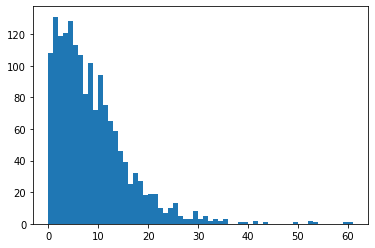

In [23]:
plt.hist(players['Player_Rating'], bins = range(min(players['Player_Rating']), max(players['Player_Rating']) + 1, 1))

In [24]:
for tournament in tournaments.Tournament_ID:
    winner = matches[(matches['Tournament_ID'] == tournament) & (matches['Match_Type'] == 'Final')]['Winner'].values[0]
    plys = list(matches[(matches['Tournament_ID'] == tournament) & (matches['Match_Type'] == 'Final')][['Player_Black', 'Player_White']].values[0])

    second = plys[0] if plys[1] == winner else plys[1]

    players.loc[players['Player_ID'] == winner, 'Player_Rating'] = (players.loc[players['Player_ID'] == winner, 'Player_Rating'].values[0] + 10) * 2
    players.loc[players['Player_ID'] == second, 'Player_Rating'] = (players.loc[players['Player_ID'] == second, 'Player_Rating'].values[0] + 5) * 2       

(array([108., 131., 119., ...,   0.,   0.,   1.]),
 array([0.000e+00, 1.000e+00, 2.000e+00, ..., 2.426e+03, 2.427e+03,
        2.428e+03]),
 <BarContainer object of 2428 artists>)

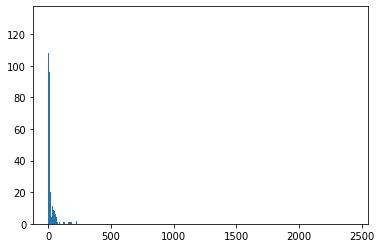

In [25]:
plt.hist(players['Player_Rating'], bins = range(min(players['Player_Rating']), max(players['Player_Rating']) + 1, 1))

In [26]:
players[players['Player_Rating'] == 0]

,Player_ID,Player_Name,DOB,Gender,FIDE_Percentile,Player_Rating,Country
47,KG-63-NPRU,Jeffery Frazier,1966-11-20,M,0,0,KG
56,NO-72-SVLU,Samuel Moore,1983-09-06,M,0,0,NO
67,IT-59-BTTN,Andres Williams,1970-10-19,M,0,0,IT
68,NE-62-IHMM,Patrick Smith,1980-10-20,M,0,0,NE
83,TJ-06-ATOI,Maureen Lowe,1980-09-28,F,0,0,TJ
...,...,...,...,...,...,...,...
1574,CV-05-CPVI,Victor Harris,1964-02-29,M,0,0,CV
1580,KP-33-QAPQ,Sarah Cunningham,1993-08-19,F,0,0,KP
1605,FR-92-EJDA,Aaron Small,1973-08-29,M,0,0,FR
1648,TW-56-WHNA,David Hall,1993-02-06,M,0,0,TW


In [27]:
players.columns = ['Player_ID', 'Player_Name', 'DOB', 'Gender', 'FIDE_Percentile', 'Player_Rating', 'Country']

In [28]:
from scipy import stats

In [29]:
players['FIDE_Percentile'] = players['Player_Rating'].apply(lambda x: stats.percentileofscore(players['Player_Rating'], x))

In [30]:
players

,Player_ID,Player_Name,DOB,Gender,FIDE_Percentile,Player_Rating,Country
0,GD-11-MCSU,Paul Fletcher,1957-06-13,M,91.947898,40,GD
1,CF-73-AWDV,Kaitlyn Sweeney,1970-12-01,F,70.011841,11,CF
2,SL-37-GVYX,Joshua Robinson,1988-10-16,M,70.011841,11,SL
3,PE-42-UTAT,James Banks,1975-11-20,M,17.702783,2,PE
4,BN-21-NJLH,Heidi Maldonado,1963-09-10,F,10.301954,1,BN
...,...,...,...,...,...,...,...
1684,NZ-96-GZBA,Roy Atkinson,1992-01-30,M,17.702783,2,NZ
1685,BN-21-QJHV,Mary Stout,1956-04-12,F,61.456483,9,BN
1686,CM-96-CDCJ,Chelsea Parks,1966-07-07,F,17.702783,2,CM
1687,PG-05-XORC,Katherine Johnson,1984-04-22,F,87.862641,27,PG


In [31]:
players.to_csv('./Data Files/player.csv', index=False)
plProfile.to_csv('./Data Files/playerProfile.csv', index=False)